# Beyond Text: LLM Web Summarizer for Quick Content Grasping 

Unlike earlier times, we live in an era where a lot of information is published on the internet. However, it may not be possible for us to go through all of it. So, it would be useful if we get a gist of the content on the websites that we visit by using a website extension. Text summarization is a fundamental task in Natural Language Processing (NLP) with applications spanning various domains, including information retrieval and content creation. Large Language Models (LLMs) have shown significant potential in enhancing summarization techniques. 

FLAN-T5 (Finetuning language models) is a general-purpose encoder-decoder LLM which is fine tuned from the T5 model to perform a wide range of sequence-to-sequence tasks. We will train our FLAN-T5 model using the LoRa technique, which requires only a small memory footprint which reduces the number of parameters to train. This website extension will be using FLAN-T5 to summarize the selected content. The technologies include HTML, CSS, JavaScript and some Natural Language Processing libraries for summarizing the web content. HTML, CSS, and JavaScript will be used for the frontend purposes for displaying the extension content. Whereas in the backend we will perform web scrapping by using python libraries like Requests, BeautifulSoup, Scrapy, and Selenium to get the content of the current URL and perform summarization for that content using LLM.  

Diverse range of LLMs, such as MPT-7b-instruct, falcon-7b-instruct, and OpenAI ChatGPT, text-davinci-003 models are the current technologies employed to perform summarization by adjusting hyperparameters, and the quality of generated summaries are being evaluated using established metrics like BLEU Score, ROUGE Score, and BERT Score. Another interesting model 'EXABSUM,' exists which is an innovative Automatic Text Summarization (ATS) approach capable of generating both extractive and abstractive summaries. It uses two distinct methods: (1) an extractive technique (EXABSUM Extractive), combining statistical and semantic scoring methods to select and extract pertinent, non-repetitive sentences from a text unit, and (2) an abstractive technique (EXABSUM Abstractive), utilizing a word graph approach (including compression and fusion stages) and re-ranking based on key phrases to generate abstractive summaries using the source document as input. In the evaluation of diverse benchmarks, EXABSUM outperformed extractive summarization methods and demonstrated competitiveness against abstractive baselines. As future considerations, this project can be extended for other types of tasks too, this is possible since Flan-T5 is good for different types of text generation tasks. 


## 0. Installing Transformers and Importing Dependencies

In [1]:
!pip install transformers

In [2]:
from transformers import pipeline
from bs4 import BeautifulSoup
import requests

## 1. Load Summarization Pipeline

In [3]:
model_name = "t5-small"

In [4]:
summarizer = pipeline("summarization", model=model_name)

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


## 2. Model Architecture

In [10]:
from transformers import TFAutoModel, AutoConfig

In [11]:
config = AutoConfig.from_pretrained(model_name)
config

T5Config {
  "_name_or_path": "t5-small",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefi

In [12]:
model = TFAutoModel.from_pretrained(model_name)
print(model)

All PyTorch model weights were used when initializing TFT5Model.

All the weights of TFT5Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5Model for predictions without further training.


In [19]:
model.summary()

Model: "tft5_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35330816  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41625344  
                                                                 
Total params: 60506624 (230.81 MB)
Trainable params: 60506624 (230.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.save("./saved_models/t5-small.keras")

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\transformers\generation\tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


## 2. Get Blog Post from Medium

In [23]:
URL = "https://medium.com/@ai-club/ml101-introduction-to-the-world-of-machine-learning-2-86e32c740b58"

In [24]:
r = requests.get(URL)

In [25]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all(['h1', 'p'])
text = [result.text for result in results]
ARTICLE = ' '.join(text)

In [26]:
ARTICLE

'Sign up Sign in Sign up Sign in ML101: Introduction to the world of Machine Learning — 2 PTU AI CLUB Follow -- Listen Share Authors: Harsha, Sakti Priya V, Yuvarani VD and Apurva Introduction Our last article in the ML101 series by PTU AI CLUB introduced you to the world of machine learning and its infinite use cases. In this article we will be diving a little deeper into this world by exploring the types of machine learning and the ethical aspects related to machine learning. We will also be providing you with a roadmap for getting started in this world. Enough talk, let’s ML! Types of Machine Learning Based on the methods and way of learning, machine learning is divided into mainly four types, which are: 1. Supervised Machine Learning2. Unsupervised Machine Learning3. Semi-supervised Machine Learning4. Reinforcement Learning Supervised machine learning is based on supervision. It means in the supervised learning technique, we train the machines using the “labeled” dataset, and based

## 3. Chunk Text

In [27]:
max_chunk = 500

In [28]:
ARTICLE = ARTICLE.replace('.', '.<eos>')
ARTICLE = ARTICLE.replace('?', '?<eos>')
ARTICLE = ARTICLE.replace('!', '!<eos>')

In [29]:
sentences = ARTICLE.split('<eos>')
current_chunk = 0 
chunks = []
for sentence in sentences:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

0


In [30]:
len(chunks)

3

## 4. Summarize Text

In [31]:
res = summarizer(chunks, max_length=120, min_length=30, do_sample=False)

Token indices sequence length is longer than the specified maximum sequence length for this model (629 > 512). Running this sequence through the model will result in indexing errors


In [32]:
res[0]

{'summary_text': 'ML101: Introduction to the world of machine learning . this article will be diving a little deeper into this world . we will also be providing you with a roadmap for getting started .'}

In [33]:
' '.join([summ['summary_text'] for summ in res])

"ML101: Introduction to the world of machine learning . this article will be diving a little deeper into this world . we will also be providing you with a roadmap for getting started . unsupervised learning is where a student is self-analyzing the same concept . under semi-supervised learning, the student has to revise himself . the goal of reinforcement learning agent is to maximize the rewards . machine learning has the power to revolutionize the way we live our lives and interact with the world around us . it's important to consider the potential ethical implications and risks associated with machine learning . the PTU AI CLUB will be coming out with more articles under the ML101 series in this spirit ."

In [34]:
text = ' '.join([summ['summary_text'] for summ in res])

In [35]:
text

"ML101: Introduction to the world of machine learning . this article will be diving a little deeper into this world . we will also be providing you with a roadmap for getting started . unsupervised learning is where a student is self-analyzing the same concept . under semi-supervised learning, the student has to revise himself . the goal of reinforcement learning agent is to maximize the rewards . machine learning has the power to revolutionize the way we live our lives and interact with the world around us . it's important to consider the potential ethical implications and risks associated with machine learning . the PTU AI CLUB will be coming out with more articles under the ML101 series in this spirit ."

## 5. Evaluation

In [36]:
!pip install rouge

In [38]:
from rouge import Rouge

rouge = Rouge()
scores = rouge.get_scores(text, ARTICLE)

In [39]:
scores

[{'rouge-1': {'r': 0.14314115308151093,
   'p': 0.9863013698630136,
   'f': 0.24999999778651866},
  'rouge-2': {'r': 0.09939148073022312,
   'p': 0.8990825688073395,
   'f': 0.17899543199726445},
  'rouge-l': {'r': 0.14314115308151093,
   'p': 0.9863013698630136,
   'f': 0.24999999778651866}}]

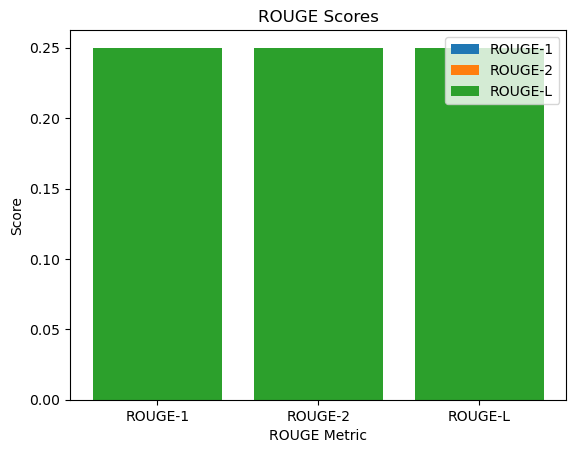

In [40]:
import matplotlib.pyplot as plt


rouge_1_scores = [score['rouge-1']['f'] for score in scores]
rouge_2_scores = [score['rouge-2']['f'] for score in scores]
rouge_l_scores = [score['rouge-l']['f'] for score in scores]

labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
plt.bar(labels, rouge_1_scores, label='ROUGE-1')
plt.bar(labels, rouge_2_scores, label='ROUGE-2')
plt.bar(labels, rouge_l_scores, label='ROUGE-L')

plt.xlabel('ROUGE Metric')
plt.ylabel('Score')
plt.title('ROUGE Scores')
plt.legend()

plt.show()


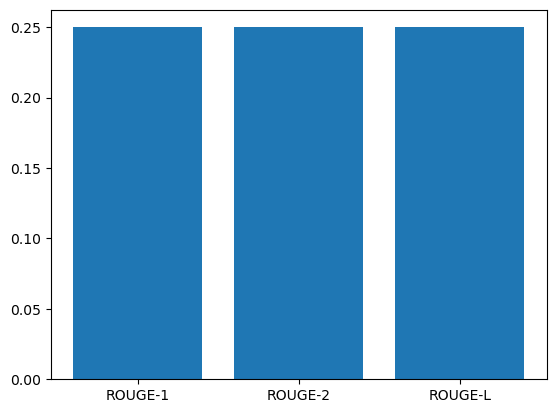

In [41]:
rouge_1_scores = [score['rouge-1']['f'] for score in scores]
plt.bar(labels, rouge_1_scores, label='ROUGE-1')
plt.show()

##  6. Output to Text File

In [42]:
with open('./summarized-results/intro-to-machine-learning/summary-t5-small.txt', 'w') as f:
    f.write(text)